In [2]:
import numpy as np
import gurobipy as gp

# Integer Programming

### Class problems

Say you are considering seven investments. 
•Cash required for each investment and the net present value 
(NPV) each investment add is given. 
•The cash available is $15,000. 
•You seek an investment policy to maximize NPV. 
•You must “go all the way” or not at all on all investments. 
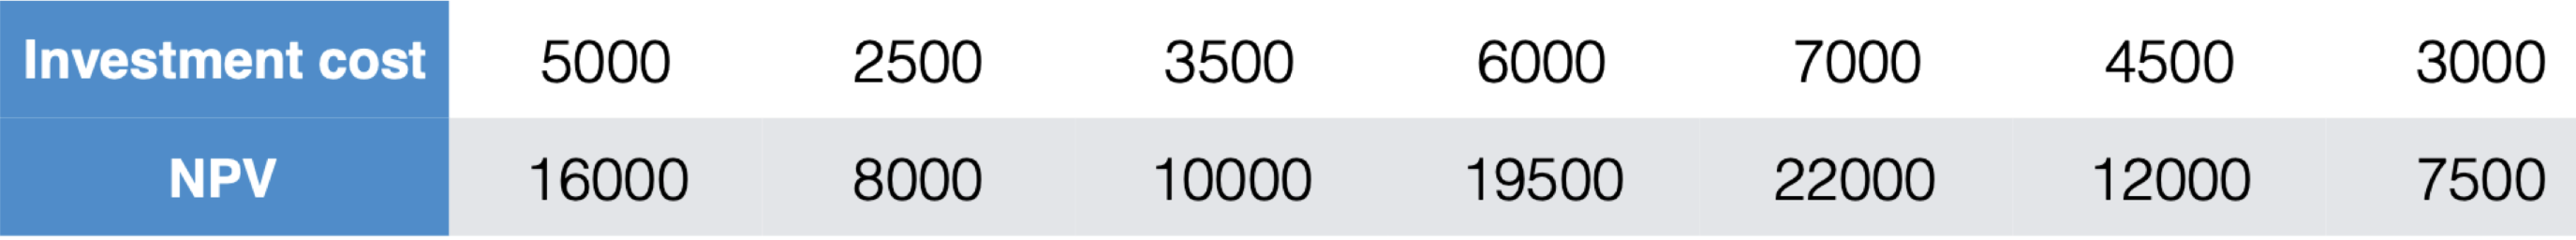

In [4]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(7,vtype=['B']*7)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

Academic license - for non-commercial use only - expires 2022-09-15
Using license file /Users/Kaushik Kumaran/gurobi.lic
46000.0
[1. 1. 0. 0. 1. 0. 0.]


Question 2
There are five opportunities to build factories labeled 1, 2, 3, 4, and 5. The factories build different items and have the costs and payoffs listed in the following table. 
•The problem is to maximize profit, which is payoff minus cost. 
•The payoff is the sum of the units manufactured times the payoff/unit. 
•You have $125 available to build and produce items. 
•The cost per item manufactured is the buy-in cost plus the cost/unit times the number of units if you manufacture at least one unit; 
otherwise, it is 0. 
•The cost is the sum of the costs per item. 
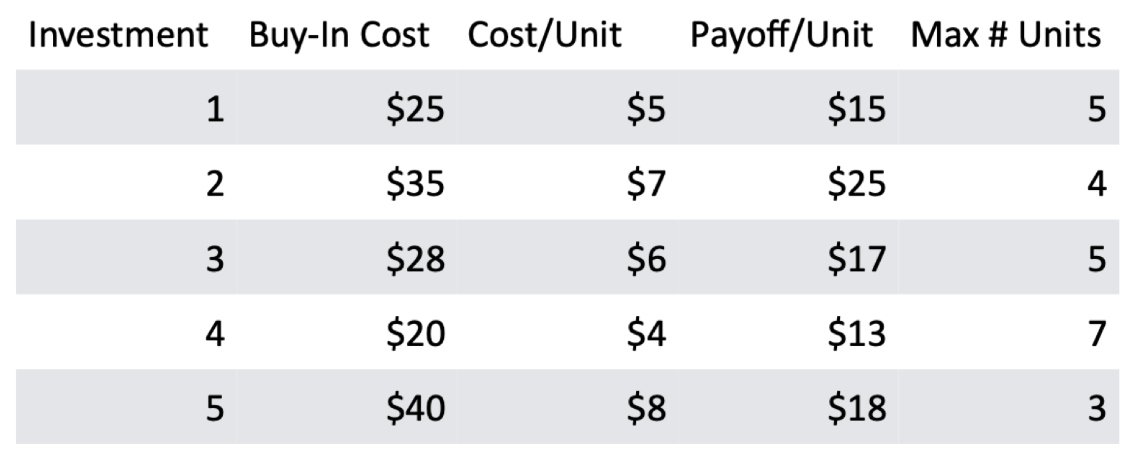

Decision variables:
Z1, z2, z3, z4, z5 – Buy in decision variables
X1, x2, x3, x4, x5 – Number of units constraints

Objective Function:
(15x1 + 25x2 + 17x3 + 13x4 + 18x5) – (25z1 + 35z2 + 28z3 + 20z4 + 40z5 + 5x1 + 7x2 + 6x3 + 4x4 + 8x5) maximize

Constraints:
25z1 + 35z2 + 28z3 + 20z4 + 40z5 + 5x1 + 7x2 + 6x3 + 4x4 + 8x5 <= 125 (cost constraint)
Include max constraints
if z1 =1 then x1 = M 
else if z1 = 0 then x1 = 0

In [19]:
M = 100
obj = np.array([-25,-35,-28,-20,-40,10,18,11,9,10])
A = np.zeros((6,10))
A[0,:] = [25,35,28,20,40,5,7,6,4,8]
A[1,:] = [-M,0,0,0,0,1,0,0,0,0]
A[2,:] = [0,-M,0,0,0,0,1,0,0,0]
A[3,:] = [0,0,-M,0,0,0,0,1,0,0]
A[4,:] = [0,0,0,-M,0,0,0,0,1,0]
A[5,:] = [0,0,0,0,-M,0,0,0,0,1]
b = np.array([125,0,0,0,0,0])
sense = np.array(['<']+5*['<'])
ub = [1,1,1,1,1,5,4,5,7,3]

In [20]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(10,vtype=['B']*5+['C']*5, ub=ub)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

80.0
[ 0.  1. -0.  1. -0.  0.  4.  0.  7.  0.]


Question 3

The Pigskin Company produces footballs. Must decide how many footballs to produce each month. 
• Forecasted monthly demands and prod costs are given below. There is also a fixed cost of $50,000 in any month there is production. 
• Pigskin wants to meet these demands on time. 
• For simplicity, assume production occurs during the month and demand occurs at the end of the month. 
• Currently has 5,000 footballs in inventory. Enough storage capacity to store up to 20,000 footballs at the end of the month, after demand has occurred. The holding cost per football held in inventory at the end of any month is figured at 5% of the production cost (per football) for that month. 
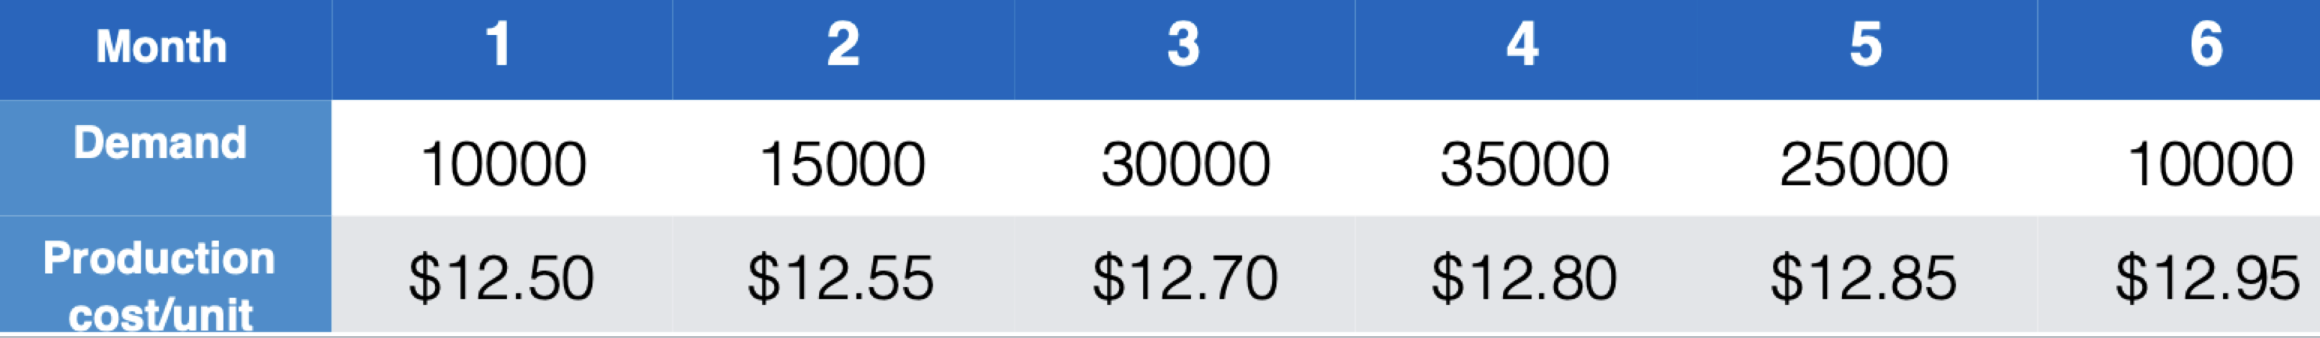

h0 = 5000
Decision variables: <br>
z1, z2, z3, z4, z5, z6 - Should it be produced in a given month? <br>
x1, x2, x3, x4, x5, x6 - Quantity to be produced <br>
h0, h1, h2, h3, h4, h5, h6 - slack variables <br>
Objective Function : <br>
Minimise cost : 12.5x1 + 12.55x2 + 12.7x3 + 12.8x4 + 12.85x5 + 12.95x6 + 50000z1 + 50000z2 + 50000z3+ 50000z4+ 50000z5+ 50000z6 0.05*12.5*h0 + 0.05 * 12.55 *h1 + 0.05*12.7*h2 + 0.05*12.8*h3 + 0.05*12.85*h4 + 0.05*12.95*h5 <br>
Constraints: <br>
h(i-1) + x(i) - d(i) = h(i) (Demand constraint) <br>
BigM constraints :
x1 - Mz1 <=0   
x2 - Mz2 <=0   
x3 - Mz3 <=0  
x4 - Mz4 <=0  
x5 - Mz5 <=0  
x6 - Mz6 <=0  

In [37]:
M = 100000
obj = np.array([50000]*6+[12.5,12.55,12.7,12.8,12.85,12.95]+[12.5*0.05,12.55*0.05,12.7*0.05,12.8*0.05,12.85*0.05,12.95*0.05])
A = np.zeros((12,18))
A[0,:] = [-M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
A[1,:] = [0,-M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
A[2,:] = [0,0,-M,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
A[3,:] = [0,0,0,-M,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
A[4,:] = [0,0,0,0,-M,0,0,0,0,0,1,0,0,0,0,0,0,0]
A[5,:] = [0,0,0,0,0,-M,0,0,0,0,0,1,0,0,0,0,0,0]
A[6,:] = [0,0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0,0,0]
A[7,:] = [0,0,0,0,0,0,0,1,0,0,0,0,1,-1,0,0,0,0]
A[8,:] = [0,0,0,0,0,0,0,0,1,0,0,0,0,1,-1,0,0,0]
A[9,:] = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-1,0,0]
A[10,:] = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-1,0]
A[11,:] = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-1]

b = np.array([0]*6+[5000,15000,30000,35000,25000,10000])
sense = np.array(['<']*6+['=']*6)
ub = [1,1,1,1,1,1,M,M,M,M,M,M]+[20000]*6

In [38]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(18,vtype=['B']*6+['C']*12, ub=ub)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

1744550.0
[ 1.0e+00 -0.0e+00  1.0e+00  1.0e+00  1.0e+00 -0.0e+00  2.0e+04  0.0e+00
  3.0e+04  3.5e+04  3.5e+04  0.0e+00  1.5e+04  0.0e+00  0.0e+00  0.0e+00
  1.0e+04  0.0e+00]


20000,0,30000,35000,35000,0

Question 4 : TSP
Decision variables : for i in range(1,5): for j in range(1,5): x[i][j]
Objective func :
for i in range(5):
    for j in range(5):
        minimise c[i][j]*x[i][j]
Constraints:  
for i in range(5):
    np.sum(x[i][j])=1
for j in range(5):
    np.sum(x[i][j])=1

In [ ]:
obj = np.array([-25,-35,-28,-20,-40,10,18,11,9,10])
A = np.zeros((6,10))
A[0,:] = [25,35,28,20,40,5,7,6,4,8]
A[1,:] = [-M,0,0,0,0,1,0,0,0,0]
A[2,:] = [0,-M,0,0,0,0,1,0,0,0]
A[3,:] = [0,0,-M,0,0,0,0,1,0,0]
A[4,:] = [0,0,0,-M,0,0,0,0,1,0]
A[5,:] = [0,0,0,0,-M,0,0,0,0,1]
b = np.array([125,0,0,0,0,0])
sense = np.array(['<']+5*['<'])
ub = [1,1,1,1,1,5,4,5,7,3]

In [ ]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(10,vtype=['B']*5+['C']*5, ub=ub)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

### Homework Problems

Question 5

Total capital available for investment is $11M. You can’t build more than one factory (warehouse) in one place. At most one warehouse must be built in Austin or Dallas. At least one factory must be built in Austin or Dallas. Find the optimal investment strategy.

 

Is building the Factory in Dallas part of the optimal investment strategy?
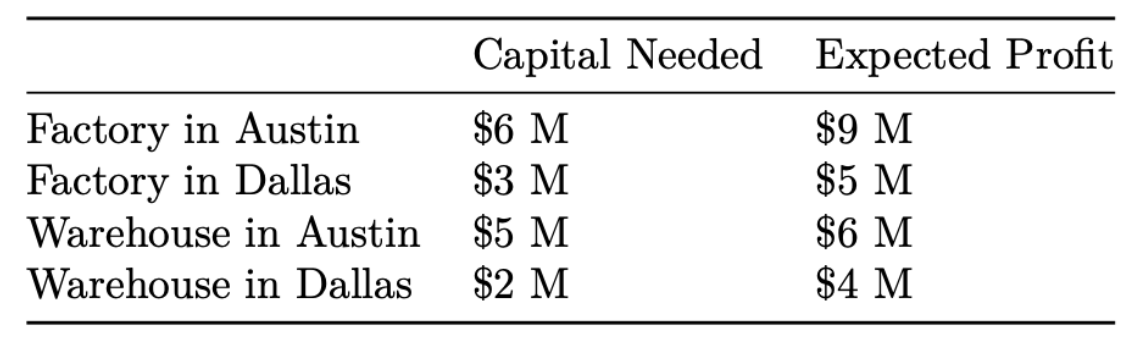

In [39]:
obj = np.array([9,5,6,4])
A = np.zeros((3,4))
A[0,:] = [6,3,5,2]
A[1,:] = [1,1,0,0]
A[2,:] = [0,0,1,1]
b = np.array([11,1,1])
sense = np.array(['<','>','<'])

In [40]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(4,vtype=['B']*4)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

18.0
[1. 1. 0. 1.]


Question 6

Western Airlines wants to design a hub system in the United States. Each hub is used for connecting flights to and from cities within 1000 miles of the hub. Western runs flights among the following cities: Atlanta (ATL), Boston (BOS), Chicago (CHI), Denver (DEN), Houston (HOU), Los Angeles (LAX), New Orleans (NO), New York (NY), Pittsburgh (PIT), Salt Lake City (SLC), San Francisco (SF), and Seattle (SEA). The company wants to determine the smallest number of hubs it needs to cover all these cities, where a city is covered if it is within 1000 miles of at least one hub. The table below lists which cities are within 1000 miles of other cities. For example, if a hub was placed at Boston (BOS), it could cover the cities of Boston, New York, and Pittsburgh.
Is SLC a hub in the optimal solution?
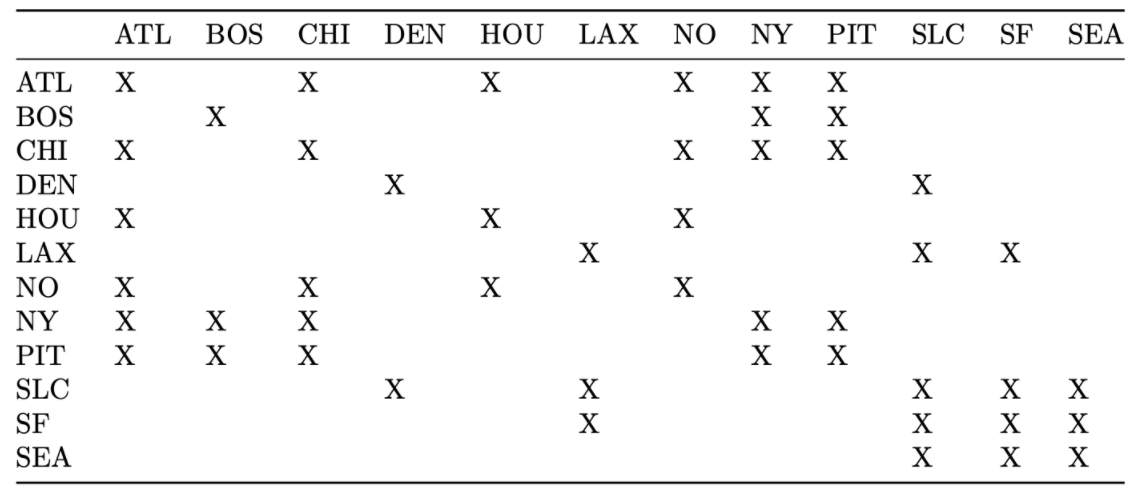

In [43]:
obj = np.array([1]*12)
A = np.zeros((11,12))
A[0,:] = [1,0,1,0,1,0,1,1,1,0,0,0]
A[1,:] = [0,1,0,0,0,0,0,1,1,0,0,0]
A[2,:] = [1,0,1,0,0,0,1,1,1,0,0,0]
A[3,:] = [0,0,0,1,0,0,0,0,0,1,0,0]
A[4,:] = [1,0,0,0,1,0,1,0,0,0,0,0]
A[5,:] = [0,0,0,0,0,1,0,0,0,1,1,0]
A[6,:] = [1,0,1,0,1,0,1,0,0,0,0,0]
A[7,:] = [1,1,1,0,0,0,0,1,1,0,0,0]
A[8,:] = [0,0,0,1,0,1,0,0,0,1,1,1]
A[9,:] = [0,0,0,0,0,1,0,0,0,1,1,1]
A[10,:] = [0,0,0,0,0,0,0,0,0,1,1,1]
b = np.array([1]*11)
sense = np.array(['>']*11)

In [44]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(12,vtype=['B']*12)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

3.0
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]


Question 7

A paper mill cuts the rolls of paper into different widths to satisfy customers’ demand. In this problem, assume the original rolls of paper are 120 inches wide. The table below shows the orders received by the paper mill.

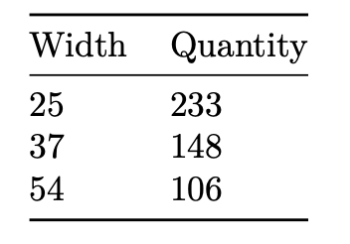

A 120 inch roll can be cut in many ways. For example, we can cut four 25-inch rolls while wasting the remaining 20 inches; we can also cut one 25-inch, one 37-inch, and one 54-inch. In the second case, only 4 inches is wasted.

Develop and solve an integer program to minimize the waste from cutting to satisfy all orders.  For more information, you can check out the cutting stock problem on wikipedia: https://en.wikipedia.org/wiki/Cutting_stock_problem (Links to an external site.)

 

How many rolls get cut into the pattern such that there are 3 cuts of 25 inches, and 1 cut of 37 inches (this pattern results in 8" waste)?

In [45]:
obj = np.array([20,8,4,16,21])
A = np.zeros((3,5))
A[0,:] = [4,3,1,2,1]
A[1,:] = [0,1,1,0,2]
A[2,:] = [0,0,1,1,0]
b = np.array([233,148,106])
sense = np.array(['>']*3)

In [46]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(5,vtype=['I']*5)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

764.0
[  0.  42. 107.  -0.  -0.]


Question 8

The days-off scheduling problem must be solved routinely by businesses that operate 6 or 7 days a week. Examples include hospitals, airlines, municipal transportation companies, and the postal service. The most common example is the (5,7)-cyclic staffing problem. The objective of it is to minimize the cost of assigning workers to a 7-day cyclic schedule so that

1) Sufficient workers are available every day.

2) Each person works 5 consecutive days and is idle to the remaining 2 days.

Here is the table showing the cost of having an employee for each day and the number of employees required for each day.

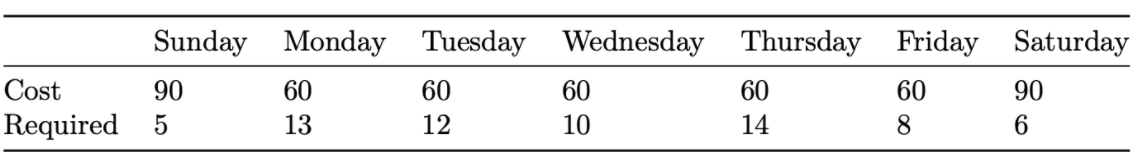

For example, the pattern that one works from Sunday to Thursday costs 90 + 60 × 4 = 330.

Formulate and solve an integer programming problem to represent this problem.

How many employees work Monday-Friday?

In [51]:
obj = np.array([300,330,360,360,360,360,330])
A = np.zeros((7,7))
A[0,:] = [1,0,0,1,1,1,1]
A[1,:] = [1,1,0,0,1,1,1]
A[2,:] = [1,1,1,0,0,1,1]
A[3,:] = [1,1,1,1,0,0,1]
A[4,:] = [1,1,1,1,1,0,0]
A[5,:] = [0,1,1,1,1,1,0]
A[6,:] = [0,0,1,1,1,1,1]
b = np.array([13,12,10,14,8,6,5])
sense = np.array(['>']*7)

In [52]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(7,vtype=['I']*7)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

4830.0
[ 8.  2. -0.  3.  1. -0.  1.]


# NLP

Question 9 - Class problem
A company manufactures and sells a product
–They get to set the price
–It costs $50/unit to manufacture
•The price drives demand through a demand function
•D=alpha*P**Beta, where alpha>0,beta<−1

In [59]:
def neg_profit(x):
    demand = 3777178*x[0]**(-2.154)
    num_sold = min(demand,x[1])
    revenue = num_sold*x[0]
    cost = x[1]*50
    profit = revenue - cost
    return -profit

In [60]:
from scipy.optimize import minimize
import numpy as np

In [66]:
optProfitNLP2 = minimize(neg_profit, [90,200], bounds = [(0,1000),(0,1000)], tol = 1e-8, method = 'L-BFGS-B')
print(-optProfitNLP2.fun)
print(optProfitNLP2.x)

9332.431351104968
[ 96.36700647 201.27310479]


Question 10
A company wants to locate a warehouse from which it will ship products to four 
customers. 
•The locations and number of shipments are given. 
•A single warehouse must be used to service all the customers. 
•The company wants to determine the location of the warehouse that minimizes the 
total distance traveled from the warehouse to the customers.
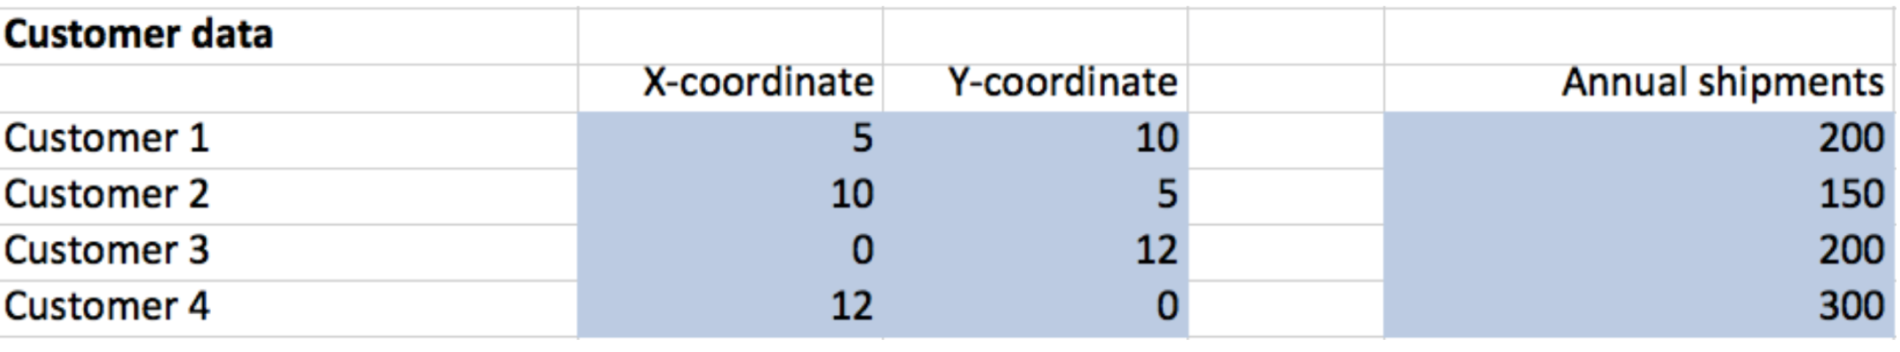
Now suppose there is a river that runs diagonally 
through town (Southwest to Northeast)
•The warehouse needs to be on the north side of the 
river for permitting

In [78]:
def minDistance(x):
    distance = np.sqrt((x[0]-5)**2 + (x[1]-10)**2)*200 + np.sqrt((x[0]-10)**2 + (x[1]-5)**2)*150 + np.sqrt((x[0]-0)**2 + (x[1]-12)**2)*200+ np.sqrt((x[0]-12)**2 + (x[1]-0)**2)*300
    return 2*distance


In [81]:
def constr(x):
    return x[1] - x[0]
constr1 = {'fun':constr, 'type':'ineq'}
constraints = [constr1]

In [82]:
optProfitNLP2 = minimize(minDistance,[0,0], tol = 1e-8, method = 'SLSQP',constraints = constraints)
print(optProfitNLP2.fun)
print(optProfitNLP2.x)

11124.981578179008
[6.93579248 6.93579248]


Question 11

It costs a company $12 to purchase an hour of labor and $15 to purchase an hour of capital. If L hours of labor and K units of capital are available, then $0.05L^{2/3}K^{1/3}$ machines can be produced. Suppose the company has $100,000 to purchase labor and capital. What is the maximum number of machines it can produce? Round to the nearest whole number of machines.

In [85]:
def maxMachines(x):
    machines = 0.05 * (x[0]**(2/3)) * (x[1]**(1/3))
    return -machines


In [84]:
-maxMachines([200,200])

-9.999999999999996

In [86]:
def constr1(x):
    return 100000 - 12*x[0] - 15*x[1]

constr1 = {'fun':constr1,'type':'ineq'}
constraints = [constr1]

In [88]:
optProfitNLP2 = minimize(maxMachines,[200, 200], bounds = [(0,10000),(0,10000)], method = 'SLSQP',constraints = constraints)
print(-optProfitNLP2.fun)
print(optProfitNLP2.x)

204.66841659101544
[5555.54578076 2222.23004207]


Question 12 



The file nflratings.csv Download nflratings.csv contains the results of 256 regular-season NFL games from the 2009 season. The teams are indexed 1 to 32 as shown below:

|Index|Team Name|Index|Team Name|Index|Team Name|Index|Team Name|
| --- |   ---   | --- |   ---   | --- |   ---   | --- |   ---   |
|  1  |Arizona Cardinals|9|Dallas Cowboys|17|Miami Dolphins|25|Pittsburgh Steelers|
|2|Atlanta Falcons|10|Denver Broncos|18|Minnesota Vikings|26|St. Louis Rams|
|3|Baltimore Ravens|11|Detroit Lions|19|New England Patriots|27|San Diego Chargers|
|4|Buffalo Bills|12|Green Bay Packers|20|New Orleans|28|San Francisco 49ers|
|5|Carolina Panthers|13|Houston Texans|21|New York Giants|29|Seattle Seahawks|
|6|Chicago Bears|14|Indianapolis Colts|22|New York Jets|30|Tampa Bay Buccaneers|
|7|Cincinnati Bengals|15|Jacksonville Jaguars|23|Oakland Raiders|31|Tennessee Titans|
|8|Cleveland Browns|16|Kansas City Chiefs|24|Philadelphia Eagles|32|Washington Redskins|

The csv data file contains a matrix with the following columns:

• Week (1-17)
• Home Team Index (1-32 from the table above)

• Visiting Team Index (1-32 from the table above)

• Home Team Score
• Visiting Team Score

For example, the first game in the matrix is team 25 Pittsburgh versus team 31 Tennessee, played at Pittsburgh. Pittsburgh won the game by a score of 13 to 10, and the point spread (home team score minus visitor team score) is 3. A positive point spread means that the home team won; a negative point spread indicates that the visiting team won.

The goal of this problem is to determine a set of ratings for the 32 NFL teams that most accurately predicts the actual outcomes of the games played, similar to homework 1. Here however, we will also incorporate a 'home field advantage' that adds some number of points to the predicted point spread.  Use NLP to find the ratings that best predict the actual point spreads observed. The model will estimate the home team advantage and the ratings.  The model accounts for the home team advantage by adding a constant (which you need to solve for) to the predicted point spread.  The objective is to minimize the sum of squared prediction errors. You will need to calculate the following:

• Actual Point Spread = Home Team Score – Visiting Team Score

• Predicted Spread = Home Team Rating – Visitor Team Rating + Home Team Advantage

• Prediction error = Actual Point Spread – Predicted Point Spread

Your goal is to minimize: 
$$ \sum_{game = 1}^{256} prediction \space error _{game}^2 $$

You will also need to normalize the ratings (like you did in HW1). To do this, you set the actual average of the ratings to be 85 (this is somewhat arbitrary but based on the well-known Sagarin rating system). What do these ratings mean: If two teams had ratings of 82 and 91, then the second team would be predicted to win by 9 points if the game was played on a neutral field.

Formulate this as an NLP and solve it.

How many games (of the 256 played) does this model predict the winner correctly?


Decision variables - Home team rating for 32 teams (r1,r2,...r32), Home team advantage (h) <br>
Objective Function - minimise sum of prediction errors <br>
for each game - prediction_error = np.square((home team score - visiting team score) - (r[HomeTeam] - r[AwayTeam] + h)) <br>
total_prediction_error = sum of prediction_error

In [123]:
import pandas as pd
nfl_ratings = pd.read_csv('nflratings.csv',header = None,names=['Week', 'HomeTeam','AwayTeam','HomeTeamScore','AwayTeamScore'])
nfl_ratings['spread'] = nfl_ratings['HomeTeamScore'] - nfl_ratings['AwayTeamScore']
nfl_ratings

,Week,HomeTeam,AwayTeam,HomeTeamScore,AwayTeamScore,spread
0,1,25,31,13,10,3
1,1,2,17,19,7,12
2,1,29,26,28,0,28
3,1,21,32,23,17,6
4,1,3,16,38,24,14
...,...,...,...,...,...,...
251,17,5,20,23,10,13
252,17,11,6,23,37,-14
253,17,22,6,37,0,37
254,17,8,15,23,17,6


In [131]:
def nfl_ratings_predictions(x):
    total_predicted_error = 0
    for index, i in nfl_ratings.iterrows():
        actual_spread = nfl_ratings['HomeTeamScore'].iloc[index] - nfl_ratings['AwayTeamScore'].iloc[index]
        predicted_spread = x[nfl_ratings['HomeTeam'].iloc[index]] - x[nfl_ratings['AwayTeam'].iloc[index]]+x[0]
        prediction_error = np.square(actual_spread-predicted_spread)
        total_predicted_error += prediction_error
    return total_predicted_error

In [136]:
optProfitNLP2 = minimize(nfl_ratings_predictions,[10]*33,bounds = [(0,100)]*33)
print(optProfitNLP2.fun)
print(optProfitNLP2.x)

42925.679780459795
[2.17263539e+00 1.68019312e+01 2.21207762e+01 2.50252138e+01
 1.53681456e+01 2.10392411e+01 1.20916748e+01 1.98237605e+01
 9.16659817e+00 2.44006220e+01 1.79153156e+01 2.78382538e+00
 2.45351191e+01 1.92636894e+01 2.31417471e+01 1.07191398e+01
 9.16772339e+00 1.88944425e+01 2.43445167e+01 2.84019474e+01
 2.79080379e+01 1.73783681e+01 2.54276764e+01 7.31241895e+00
 2.32376604e+01 1.89219216e+01 1.30283633e-05 2.48852941e+01
 1.75214937e+01 7.01150213e+00 1.14504849e+01 1.44676979e+01
 1.24157930e+01]


In [141]:
predicted_spread_optimised_list = []
for index, i in nfl_ratings.iterrows():
    predicted_spread_optimised = round(optProfitNLP2.x[nfl_ratings['HomeTeam'].iloc[index]] - optProfitNLP2.x[nfl_ratings['AwayTeam'].iloc[index]] + optProfitNLP2.x[0],0)
    predicted_spread_optimised_list.append(predicted_spread_optimised)
    

In [149]:
nfl_ratings['predicted_spread_optimised_list'] = predicted_spread_optimised_list
nfl_ratings['Actual'] = np.where(nfl_ratings['spread']>=0, 1, 0)
nfl_ratings['Predicted'] = np.where(nfl_ratings['predicted_spread_optimised_list']>=0, 1, 0)
nfl_ratings

,Week,HomeTeam,AwayTeam,HomeTeamScore,AwayTeamScore,spread,predicted_spread_optimised_list,Actual,Predicted
0,1,25,31,13,10,3,7.0,1,1
1,1,2,17,19,7,12,5.0,1,1
2,1,29,26,28,0,28,9.0,1,1
3,1,21,32,23,17,6,7.0,1,1
4,1,3,16,38,24,14,18.0,1,1
...,...,...,...,...,...,...,...,...,...
251,17,5,20,23,10,13,-5.0,1,0
252,17,11,6,23,37,-14,-7.0,0,0
253,17,22,6,37,0,37,16.0,1,1
254,17,8,15,23,17,6,1.0,1,1


In [150]:
nfl_ratings[nfl_ratings['Actual']==nfl_ratings['Predicted']]['Actual'].count()

181

Question 13

The file variable_selection.csv  Download variable_selection.csvcontains observations of variables y, x1, x2, and x3. Here, y is the dependent variable. We want to choose a linear model that uses at most two independent variables such that the sum of squared residuals is minimized. This can be formulated as a constrained quadratic programming problem. 

This is called best subset problem that is usually very hard to solve. We will solve this problem by enumeration. Run six OLS regressions (3 with one independent variable and three more with two variables each) and choose the regression that best fits the data. You can run each regression in R using the lm routine.

 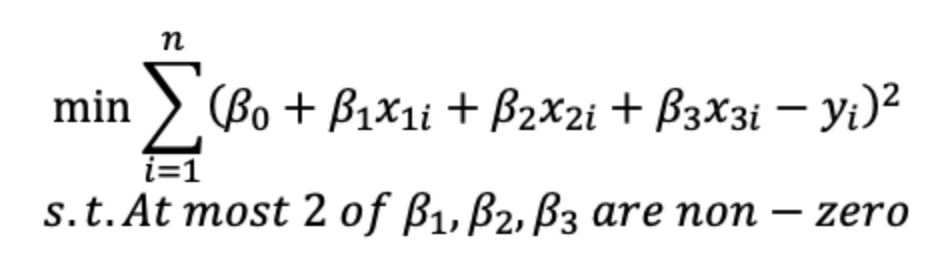

Which variables are included?

In [185]:
import pandas as pd
variable_selection = pd.read_csv('variable_selection.csv')
variable_selection

,Unnamed: 0,y,x1,x2,x3
0,1,42.412844,4.529686,7.172525,15.356190
1,2,24.820174,2.516030,4.377053,6.084709
2,3,26.617801,3.038386,4.411439,11.563392
3,4,21.329637,1.602293,4.225374,9.365461
4,5,34.183805,4.148982,5.618860,8.534010
...,...,...,...,...,...
95,96,24.656431,2.607587,4.077544,12.309712
96,97,39.280398,2.874912,7.871697,11.435131
97,98,30.085919,3.768077,4.622765,16.279047
98,99,31.639203,2.645656,5.991489,7.619829


Decision variables - x1, x2, x3 (whether it is 1 or 0)
Objective Function - Minimise sum of squared residuals
(y- B1x1)build 6 ols models

In [232]:
list_x = ['x1','x2','x3']
for l in list_x:   
    print('Variable : '+l)
    def func(x):
        total_predicted_error = 0
        for index, i in variable_selection.iterrows():
            actual_value = variable_selection['y'].iloc[index]
            predicted_value = x[0]*variable_selection[l].iloc[index]
            prediction_error = np.square(actual_value-predicted_value)
            total_predicted_error += prediction_error
        return total_predicted_error
    optProfitNLP2 = minimize(func,[1])
    print(optProfitNLP2.fun)
#     print(optProfitNLP2.x)

from itertools import combinations
z = list(combinations(list_x,2))
for l in z:   
    print(l)
    def func(x):
        total_predicted_error = 0
        for index, i in variable_selection.iterrows():
            actual_value = variable_selection['y'].iloc[index]
            predicted_value = x[0]*variable_selection[l[0]].iloc[index] + x[1]*variable_selection[l[1]].iloc[index]
            prediction_error = np.square(actual_value-predicted_value)
            total_predicted_error += prediction_error
        return total_predicted_error
    optProfitNLP2 = minimize(func,[1,1])
    print(optProfitNLP2.fun)
#     print(optProfitNLP2.x)

Variable : x1
12188.314383766117
Variable : x2
2279.514046575269
Variable : x3
16195.561743075079
('x1', 'x2')
26.332768055690348
('x1', 'x3')
10245.524470435985
('x2', 'x3')
1348.289800288868


Question 14: 
The following csv file ( hw5data.csv  Download hw5data.csv ) has data that we will use to help define an objective function.  The columns in the file are w1, w2, w3.  We want to pick x, y, and z to minimize
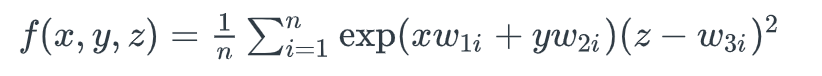

To help with the calculus I will tell you the derivative of each summand with respect to x, y, z.




where fi is the i'th element of the objective function sum.

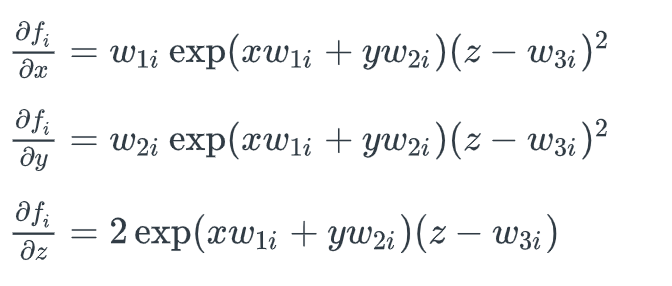 

Start with an initial guess of x,y,z = 0 and run 50000 epochs of gradient descent with a step size of 1e-3.  This will be used as our base case solution.  What is the optimal objective value? Round to 3 decimal places.

In [247]:
import pandas as pd
h5data = pd.read_csv('hw5data.csv')
h5data

,w1,w2,w3
0,0.804264,-0.279226,0.675103
1,-0.498909,-0.191620,1.637611
2,-0.773979,-0.208076,0.174573
3,1.907634,2.186758,3.022080
4,-0.642327,0.354942,0.833098
...,...,...,...
195,0.094264,0.557352,2.500823
196,0.591495,0.009174,1.581164
197,0.931319,0.894461,0.592521
198,-0.803304,1.603877,0.376878


In [253]:
learnRate = 1e-3
batches = 10
epochs = 50000
dat_per_bat = int(h5data.shape[0]/batches)

In [254]:
w1 = h5data['w1']
w2 = h5data['w2']
w3 = h5data['w3']

In [250]:
GDError = np.zeros(epochs)
beta = np.zeros(3)
for ep in range(epochs):
    gradx = np.mean(w1*np.exp(beta[0]*w1 + beta[1]*w2)*np.square(beta[2]-w3))
    grady = np.mean(w2*np.exp(beta[0]*w1 + beta[1]*w2)*np.square(beta[2]-w3))
    gradz = 2.0*np.mean(np.exp(beta[0]*w1 + beta[1]*w2)*(beta[2]-w3))
    grad = np.array([gradx,grady,gradz])
    
    GDError[ep] = np.mean(np.exp(beta[0]*w1 + beta[1]*w2)*np.square(beta[2]-w3))
    beta -= learnRate*grad
print(GDError[ep])
print(beta)

0.9840185202021346
[-0.15675855  0.17689576  0.95909562]


In [256]:
learnRate = 1e-3
e=1e-12
batches = 20
dat_per_bat = 10
epochs = 100

In [257]:
np.random.seed(4382)
SGDError = np.zeros(epochs)
beta = np.zeros(3)
for ep in range(epochs):
    shuf = np.random.choice(range(ndata),size=ndata,replace=False)
    for bat in range(batches):
        this_bat = shuf[(bat*dat_per_bat):((bat+1)*dat_per_bat)]
        gradx = np.mean(w1*np.exp(beta[0]*w1 + beta[1]*w2)*np.square(beta[2]-w3))
        grady = np.mean(w2*np.exp(beta[0]*w1 + beta[1]*w2)*np.square(beta[2]-w3))
        gradz = 2.0*np.mean(np.exp(beta[0]*w1 + beta[1]*w2)*(beta[2]-w3))
        grad = np.array([gradx,grady,gradz])
        beta -= learnRate*grad
    SGDError[ep] = np.mean(np.exp(beta[0]*w1 + beta[1]*w2)*np.square(beta[2]-w3))
print(SGDError[ep])
print(beta)

0.9850845130063359
[-0.17515     0.13664383  0.93726456]


# Linear Algebra

Question 15 <br>
x1 + x2 + x3 + x4 = 250 <br>
x1 = 0.55(x1 + x2).......0.45*x1 - 0.55x2 = 0 <br>
x2 = 0.25(x1 + x2 + x3 + x4).......0.25x1 - 0.75x2 + 0.25x3 + 0.25x4 = 0 <br>
0.14*x1 + 0.2*x2 + 0.2*x3 + 0.1*x4 = 0.15*(x1 + x2 + x3 + x4)... 0.01x1 -0.05x2 -0.05x3 + 0.05x4 = 0<br>

In [264]:
A = np.array([[1,1,1,1],[0.45,-0.55,0,0],[0.25,-0.75,0.25,0.25],[0.01,-0.05,-0.05,0.05]])
B = np.array([250,0,0,0])
x = np.linalg.solve(A,B)
x

array([76.38888889, 62.5       , 31.94444444, 79.16666667])

# Linear Programming

Question 16 <br>
A glass manufacturer makes 6 oz and 10 oz juice glasses  
•How many cases of each type of glass should be produced per week in order to maximize profits?   
•100 cases of 6 Oz juice glasses require 6 production hours & 100 cases of 10 Oz juice glasses require 5 hours   
•60 hours of production capacity available per week  
•A case of 6 Oz glasses requires 10 cubic feet of storage space and a case of 10 Oz glasses requires 20 cubic feet  
•Storage capacity of 15,000 cubic feet is available per week  
•6 Oz glasses make $5.00 per case and 10 Oz glasses make $4.50 per case  
•Customers will not accept more than 800 cases per week of 6 Oz glasses  
•There is no limit on the amount that can be sold of 10 Oz glasses   

x1 - number of 6oz glasses  
x2 - number of 10 oz glasses  
0.06x1 + 0.05x2 <= 60  
10x1 + 20x2 <= 15000  
x1 <= 800  
Objective - maximise 5x1 + 4.5x2

In [271]:
obj = np.array([5,4.5])
A = np.zeros((3,2))
A[0,:] = [0.06,0.05] 
A[1,:] = [10,20]
A[2,:] = [1,0]
b = np.array([60,15000,800])
sense = np.array(['<']*3)

In [275]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(2,vtype=['C']*2)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

5142.857142857143
[642.85714286 428.57142857]


Question 17:
A trading company is looking for a way to maximize profit per transportation of their goods. The company has a train available with 3 wagons. 
•When stocking the wagons they can choose between 4 types of cargo, each with its own specifications. 
•How much of each cargo type should be loaded on which wagon in order to maximize profit? 
•The following constraints must be taken in consideration; –Weight capacity per train wagon 
–Volume capacity per train wagon 
–Limited availability per cargo type 
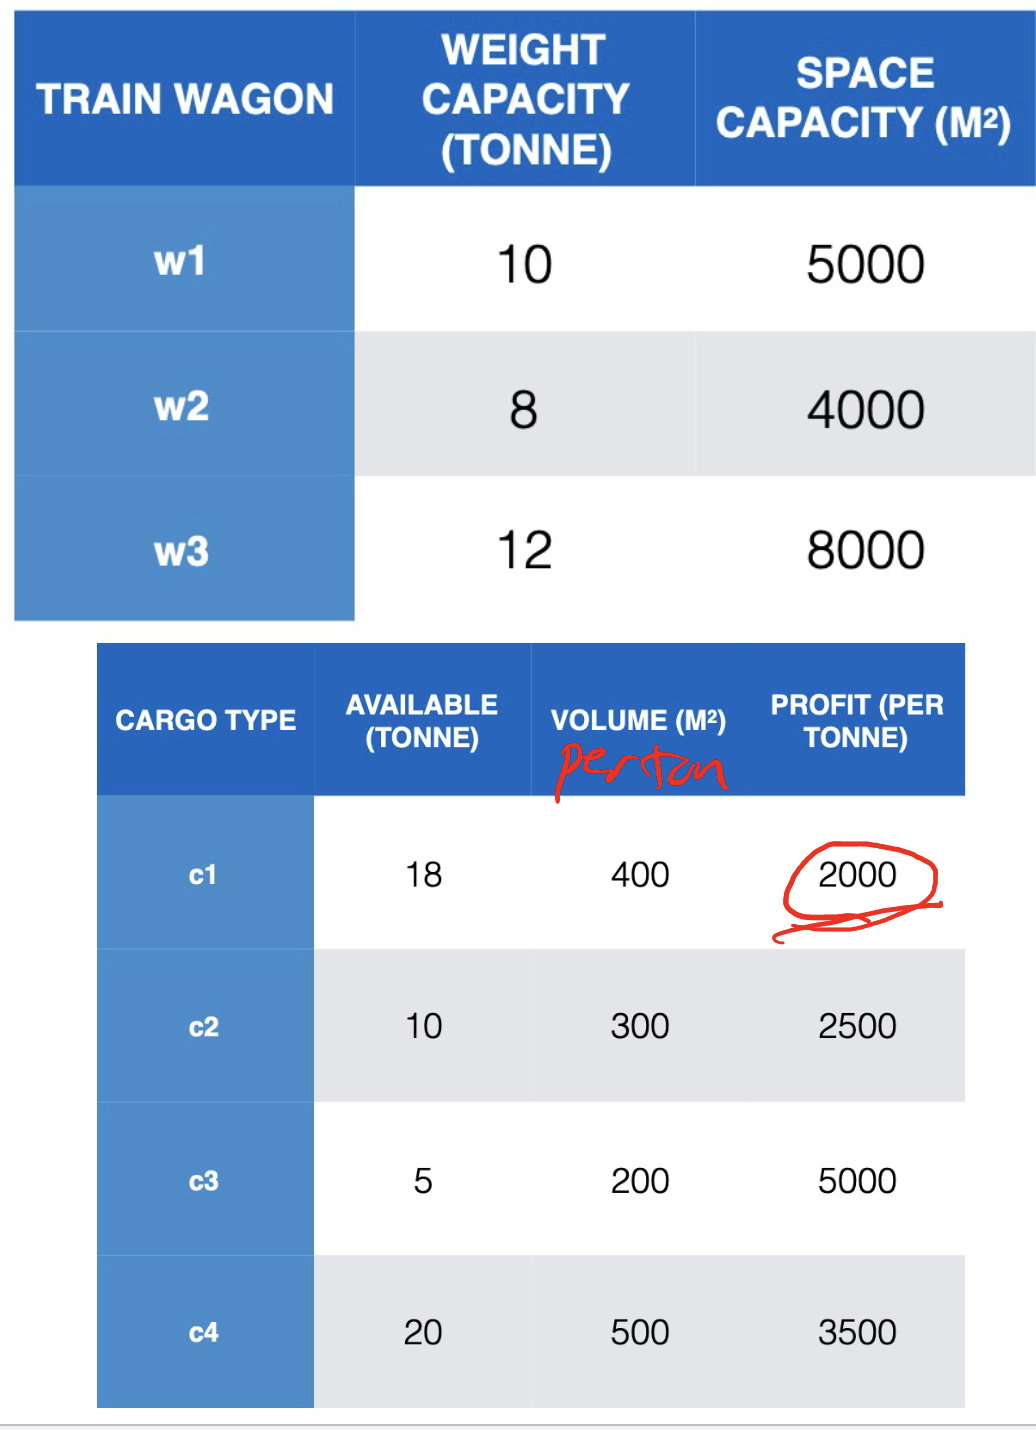

Decision variables : c11, c12, c13, c21, c22, c23, c31, c32, c33, c41, c42, c43  
Objective Function : 2000*(c11 + c12 + c13) + 2500*(c21 + c22 + c23) + 5000*(c31+c32+c33) + 3500*(c41+c42+c43)  
Constraints :  
Space capacity:  
400*c11 + 300*c21 + 200*c31+ 500*c41 <= 5000  
400*c12 + 300*c22 + 200*c32+ 500*c42 <= 4000  
400*c13 + 300*c23 + 200*c33+ 500*c43 <= 8000 

Weight Capacity:  
c11 + c21 + c31 + c41 <= 10  
c12 + c22 + c32 + c42 <= 8  
c13 + c23 + c33 + c43 <= 12  

Availability:  
c11 + c12 + c13 <= 18  
c21 + c22 + c23 <= 10  
c31 + c32 + c33 <= 5  
c41 + c42 + c43 <= 20  

In [276]:
obj = np.array([2000,2000,2000,2500,2500,2500,5000,5000,5000,3500,3500,3500])
A = np.zeros((10,12))
A[0,:] = [400,0,0,300,0,0,200,0,0,500,0,0] 
A[1,:] = [0,400,0,0,300,0,0,200,0,0,500,0]
A[2,:] = [0,0, 400,0,0,300,0,0,200,0,0,500]
A[3,:] = [1,0,0,1,0,0,1,0,0,1,0,0] 
A[4,:] = [0,1,0,0,1,0,0,1,0,0,1,0]
A[5,:] = [0,0, 1,0,0,1,0,0,1,0,0,1]
A[6,:] = [1,1,1,0,0,0,0,0,0,0,0,0]
A[7,:] = [0,0, 0,1,1,1,0,0,0,0,0,0]
A[8,:] = [0,0, 0,0,0,0,1,1,1,0,0,0]
A[9,:] = [0,0, 0,0,0,0,0,0,0,1,1,1]
b = np.array([5000, 4000,8000,10,8,12,18,10,5,20])
sense = np.array(['<']*10)

In [278]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(12,vtype=['C']*12)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

107500.0
[ 0.  0.  0.  5.  0.  0.  5.  0.  0.  0.  8. 12.]


Question 18 :   
•A Crude oil refining firm distills crude petroleum from two sources, Saudi
Arabia and Venezuela, into 3 main products: gasoline, jet fuel and lubricants.   
•Each barrel of Saudi crude yields 0.3, 0.4 and 0.2 barrels of gasoline, jet fuel 
and lubricants, respectively. Similarly, each barrel of Venezuelan crude yields 
0.4, 0.2 and 0.3 respectively. Remaining 10% in each case is lost to refining.   
•The firm can purchase up to 9000 barrels of Saudi crude per day at $20 per 
barrel and up to 6000 barrels of Venezuelan crude per day at $15 per barrel.   
•The firm’s existing contracts require the delivery of 2000, 1500 and 500 
barrels of gasoline, jet fuel and lubricants per day.    
•How can these requirements be fulfilled most efficiently?  

Decision variables :  x1 is number of Saudi barrels, x2 is number of Venezuela barrels   
Objective function : 20x1 + 15x2 (minimize)   
COnstraints :  
0.3x1 + 0.4x2 >= 2000  
0.4x1 + 0.2x2 >= 1500  
0.2x1 + 0.3x2 >= 500  
x1 <= 9000  
x2 <= 6000  

In [279]:
obj = np.array([20,15])
A = np.zeros((3,2))
A[0,:] = [0.3,0.4] 
A[1,:] = [0.4,0.2]
A[2,:] = [0.2,0.3]
ub = [9000,6000]
b = np.array([2000,1500,500])
sense = np.array(['>']*3)

In [280]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(2,vtype=['C']*2,ub=ub)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

92500.0
[2000. 3500.]


In [ ]:
# Sensitivity Analysis for reference
[ojMod_con[0].Pi , ojMod_con[1].Pi , ojMod_con[2].Pi]
[con.Pi for con in ojMod_con]
[con.SARHSLow for con in ojMod_con]
[con.SARHSUp for con in ojMod_con]
ojMod_x.SAObjLow
ojMod_x.SAObjUp

# Exam Questions - Last Year

Question 19:

You are a medical student planning your career.  You have 3 specializations to choose from to help plan your class schedule for your last few years of med school.  The different specializations require different number of hours of training to master, and have different earning potentials.  You want to minimize the cost of attending school (small number of training hours) while maintaining a minimum threshold on earning potential.  Specialization 1 (neurology: brain) has an earning potential of $450k per year and requires 500 training hours, specialization 2 (onology: cancer) has an earning potential of $600k per year and requires 550 training hours, and specialization 3 (cardiology: heart) has an earning potential of $750k per year and requires 650 training hours. 

 

You can also take some extra classes on top of your specialization training to become a pediatric neurologist or pediatric oncologist, but not a pediatric cardiologist; you can only become a pediatric oncologist if you choose oncology as your specialization..same goes for neurology.  Becoming a pediatric neurologist would add $200k per year to your earning potential (on top of the $450k per year of being a regular neurologist) or becoming a pediatric oncologist would ADD $150k per year to your earning potential of being a regular oncologist.  Both of these would require a special class that requires 50 hours of training.  For non-native speakers, pediatric means specializing in kids.  So if you are a pediatric oncologist you specialize in kids who have cancer instead of adults.  From here on, if I say pediatrician I mean that your specialization is either neurology or oncology AND you focus on kids.

 

All med students must also choose between 2 pharmacy classes, PHARM 1 or PHARM 2.  PHARM 1 requires 50 training hours and PHARM 2 requires 70 (these are not sequential classes, you just choose 1 or 2). If your specialization is pediatric, then you must take PHARM 2.  You must also choose between 2 psychology classes: PSYCH 1 or 2 (these are not sequential classes, you just choose 1 or 2).  PSYCH 1 requires 150 training hours and PSYCH 2 requires 200 training hours.  PSYCH 1 is only available if you are a cardiologist or if your specialization is pediatric, but PSYCH 2 is available to everyone.  You must pick exactly one specialization, 1 pharm class, and 1 psych class.  Your specialization may or may not be pediatric.  You want to pick the specialization that requires the fewest training hours that has an earning potential of at least $600k per year.

 

Let s1, s2, s3 be the binary variables representing which specialization you choose.

Let k1 and k2 be the binary variables representing whether you become a pediatrician for specialization 1 or 2. (k for kids)

Let d1 and d2 be the binary variables representing which pharmacy class you take. (d for drugs)

Let p1 and p2 be the binary variables representing which psychology class you take.

 

How many hours of training does your optimal schedule require? Round to the nearest hour

 

Hint: The way I solved the problem there are 8 constraints

1) You must pick only 1 specialization

2) k1 can only be chosen for specialization 1

3) k2 can only be chosen for specialization 2

4) You must pick only 1 pharmacy class

5) PHARM 2 must be chosen if you become a pediatrician

6) You must pick only 1 psych class

7) PSYCH 1 can only be taken if you become a cardiologist or pediatrician

8) You must have an earning potential of at least $600k per year.

In [309]:
obj = np.array([500,550,650,50,50,50,70,150,200])
A = np.zeros((8,9))
A[0,0:2] = [1] 
A[1,[0,3]] = [1,-1]
A[2,[1,4]] = [1,-1]
A[3,[5,6]] = [1,1]
A[4,[3,4,6]] = [1,1,-1]
A[5,[7,8]] = [1,1]
A[6,[2,3,4,7]] = [1,1,1,-1]
A[7,0:5] = [450,600,750,200,150]
b = np.array([1,0,0,1,0,1,0,600])
sense = np.array(['=','>','>','=','<','=','>','>'])

In [310]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(9,vtype=['B']*9)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

770.0
[ 1.  0. -0.  1. -0.  0.  1.  1.  0.]


Question 20:

There are 3 dams on a river, and 4 cities in the region powered by these dams.  You work for the electric company and decide how much you should open the valves on each of the 3 dams.  Opening the valves releases water that flows through a generator and produces electricity.   

Dam 1 provides electricity to cities A, B and D.

Dam 2 provides electricity to cities A, C, and D.

Dam 3 provides electricity to cities B, C and D.

Each dam can open their valves partially anywhere between completely closed and completely open.  Let xi be how much the value on dam i is open, x1 = 0.25 would mean that the valve on dam1 is 25% open.  0 <= xi <= 1.  Electricity from each dam flows equally to all the cities serviced by that dam.

The demand for electricity in city A is 44 megawatts (maybe per hour, maybe giga, I don't really understand electricity production that well...whatever, let's just use megawatts, Mw).  The demand for electricity in city B is 20 Mw, for city C it's 50 Mw and for city D it's 19 Mw.

You must also produce at least as much electricity, from the 3 dams, as the aggregate demand of all the cities.  Your goal as the electric operator is to open each dam's valves in such a way that you get as close as possible to each city's demand, in terms of sum of squared difference between demand and electricity produced. When you don't match the cities' demand perfectly, electricity will be routed to an expensive distribution center, and you want to avoid that as much as possible.

Since all three dams are on the same river dam 1 is upriver from dam2 which is upriver from dam3.  Therefore opening the valve at dam1 will make the water flow more heavily at dam2 and dam3, and opening the valve at dam 2 will make the water flow more at dam3.

The electricity produced by dam1, as a function of x1 is e1 = 50 x1 .

The electricity produced by dam2, as a function of x1 and x2 is e2 = 50 x2 + 20 x12.

The electricity produced by dam3, as a function of x1, x2 and x3 is e3 = 50 x3 + 20 x22 + 10 x12.

City A gets electricity from dams 1 and 2, so it gets e1/3 + e2/3, since dam 1 splits its electricity equally between cities A, B and D, and dam 2 splits its electricity equally between cities A, C and D.

City B gets e1/3 + e3/3.

City C gets e2/3 + e3/3

City D gets e1/3 + e2/3 + e3/3

Find the optimal values for x1, x2, x3, that minimizes the sum of squared differences between the electricity provided to each city and the demand at that city, subject to the constraint that the total electricity produced is at least equal to the aggregate demand.  When you go to solve this problem start with an initial guess of x1 = x2 = x3 = 0.9.

At optimality, what is the aggregate amount of electricity produced by all 3 dams? Round to the nearest Mw.

HINT: you should be able to figure this out without solving the problem.

In [285]:
def sum_squares(x):
    citya = np.square(50/3*x[0] + 50/3*x[1] + 20/3*x[0]*x[0] - 44)
    cityb = np.square(50/3*x[0] + 50/3*x[2] + 20/3*x[1]*x[1] + 10/3*x[0]*x[0] - 20)
    cityc = np.square(50/3*x[1] + 50/3*x[2] + 20/3*x[1]*x[1]+ 20/3*x[0]*x[0] + 10/3*x[0]*x[0] - 50)
    cityd = np.square(50/3*x[0] + 50/3*x[1] + 50/3*x[2] + 20/3*x[1]*x[1]+ 20/3*x[0]*x[0] + 10/3*x[0]*x[0] - 19)
    sum_sqaures_value = citya + cityb +cityc +cityd
    return sum_sqaures_value

In [301]:
dA = 44
dB = 20
dC = 50
dD = 19
def con(x):
    e1 = 50*x[0]
    e2 = 50*x[1] + 20*x[0]**2
    e3 = 50*x[2] + 20*x[1]**2 + 10*x[0]**2
    pA = e1/3 + e2/3
    pB = e1/3 + e3/3
    pC = e2/3 + e3/3
    pD = e1/3+e2/3+e3/3
    return pA+pB+pC+pD - (dA+dB+dC+dD)

con1 = {'type':'ineq', 'fun': con}
cons = [con1]

In [302]:
optProfitNLP2 = minimize(sum_squares,[0.9,0.9,0.9],bounds = [(0,1),(0,1),(0,1)],constraints = cons)
print(optProfitNLP2.fun)
print(optProfitNLP2.x)

1108.8599685066965
[0.78492281 1.         0.10541487]


In [305]:
50*optProfitNLP2.x[0] + 50*optProfitNLP2.x[1] + 20*optProfitNLP2.x[0]**2 + 50*optProfitNLP2.x[2] + 20* optProfitNLP2.x[1]**2+10*optProfitNLP2.x[0]**2


132.99999862825933

In [306]:
50*optProfitNLP2.x[0]

39.246140633903934

Question 21

In [295]:
obj = np.array([70000,80000,30000,50000])
A = np.zeros((1,4))
A[0,] = [40000,50000,20000,30000] 
b = np.array([50000])
sense = np.array(['<'])
ub = [1]*4

In [296]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(4,vtype=['C']*4,ub=ub)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

86666.66666666666
[1.         0.         0.         0.33333333]


In [298]:
A = np.array([[8,3,2,1],[1,0,1,1],[1,-1,0,2],[-2,3,-4,13]])
B = np.array([5,-1,4,140])
X = np.linalg.solve(A,B)
round(X[0],2)

-1.66

Question 22

In [313]:
obj = np.array([50000,55000,65000,5000,5000,5000,7000,15000,20000])
A = np.zeros((9,9))
A[0,0:3] = [1,1,1] 
A[1,[0,3]] = [1,-1]
A[2,[1,4]] = [1,-1]
A[3,[3,4]] = [1,1]
A[4,[5,6]] = [1,1]
A[5,[3,4,6]] = [1,1,-1]
A[6,[7,8]] = [1,1]
A[7,[2,3,4,7]] = [1,1,1,-1]
A[8,0:5] = [450,600,750,200,150]
b = np.array([1,0,0,1,1,0,1,0,600])
sense = np.array(['=','>','>','=','=','<','=','>','>'])

In [314]:
AdModel = gp.Model()

AdModX = AdModel.addMVar(9,vtype=['B']*9)

AdModCon = AdModel.addMConstrs(A, AdModX, sense, b)
AdModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

AdModel.Params.OutputFlag = 0
AdModel.optimize() 

print(AdModel.objVal)
print(AdModX.x)

77000.0
[1. 0. 0. 1. 0. 0. 1. 1. 0.]
